# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering popular usado como uma alternativa ao K-Means, em análise preditiva. Ele não requer que você defina o número de clusters. Mas em troca, você tem que ajustar dois outros parâmetros.

O Agrupamento Espacial Baseado em Densidade de Aplicações com Ruído (DBSCAN) é um algoritmo de agrupamento de dados proposto por Martin Ester, Hans-Peter Kriegel, Jörg Sander e Xiaowei Xu em 1996. Trata-se de um algoritmo de agrupamento baseado em densidade: dado um conjunto de pontos em algum espaço, agrupa pontos que estão intimamente próximos (pontos com muitos vizinhos próximos), e marcando como outliers pontos que estão sozinhos em regiões de baixa densidade (vizinhos que estão muito longe). DBSCAN é um dos algoritmos de agrupamento mais comuns e também mais citados na literatura científica.

Em 2014, o algoritmo foi premiado com o prêmio de teste de tempo na principal conferência de mineração de dados, KDD.

A implementação do Scikit-Learn fornece um padrão para os parâmetros eps e min_samples, mas que geralmente devem ser ajustados. O parâmetro eps é a distância máxima entre dois pontos de dados a serem considerados na mesma vizinhança. O parâmetro min_samples é a quantidade mínima de pontos de dados em um bairro (neighborhood) a ser considerado um cluster.

Uma vantagem do DBSCAN sobre o K-Means é que DBSCAN não é restrito a um número de conjuntos de clusters durante a inicialização. O algoritmo determinará um número de aglomerados com base na densidade de uma região. Tenha em mente, no entanto, que o algoritmo depende dos parâmetros eps e min_samples para descobrir qual a densidade de cada cluster.

Como o algoritmo DBSCAN tem um conceito interno de ruído, é comumente usado para detectar valores anómalos nos dados - por exemplo, atividade fraudulenta em cartões de crédito, e-commerce ou reivindicações de seguros.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
%matplotlib inline

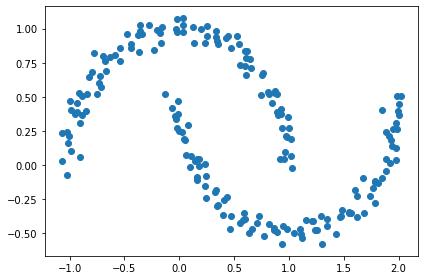

In [2]:
# Gerando os dados
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

In [3]:
# Construção do modelo
modelo = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean') 

In [4]:
# Fit dos dados
y_db = modelo.fit_predict(X)

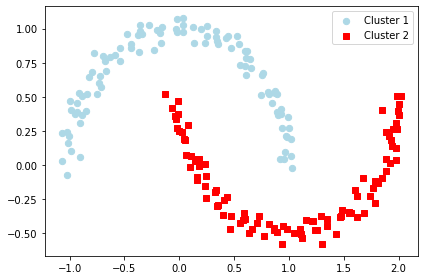

In [5]:
# Plot
plt.scatter(X[y_db==0,0], X[y_db==0,1], c = 'lightblue', marker = 'o', s = 40, label = 'Cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c = 'red', marker = 's', s = 40, label = 'Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

## DBScan com Dataset Iris

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline

In [7]:
# Carregando os dados
iris = load_iris()

In [8]:
# Modelo
dbscan = DBSCAN()

In [9]:
# Fit
dbscan.fit(iris.data)

DBSCAN()

In [10]:
# Labels
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
# Reduzindo a Dimensionalidade
pca = PCA(n_components = 2).fit(iris.data)

In [12]:
# Fit
pca_2d = pca.transform(iris.data)

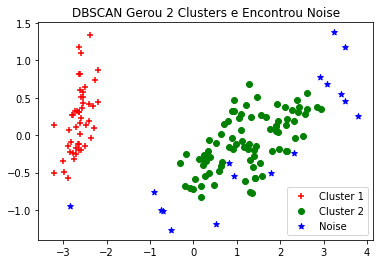

In [13]:
# Plot
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN Gerou 2 Clusters e Encontrou Noise')
plt.show()